In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df5 = pd.read_csv('vgnew9.csv')

In [2]:
df5 = df5.drop(['Unnamed: 0','Rank'],axis=1)

In [3]:
df5 = df5.dropna()

In [4]:
df5.multiplayer.value_counts(normalize = True)
df5.Year = df5.Year.astype('int64')
#les jeux multijoueurs sont plus nombreux que les jeux avec un seul joueur

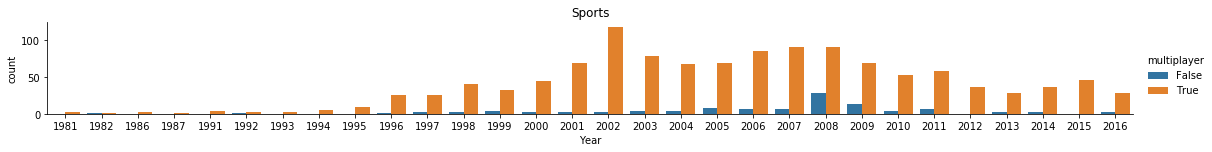

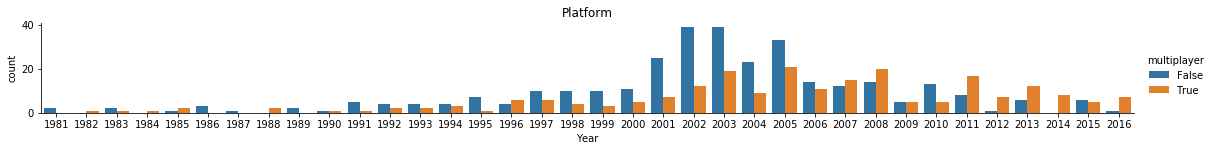

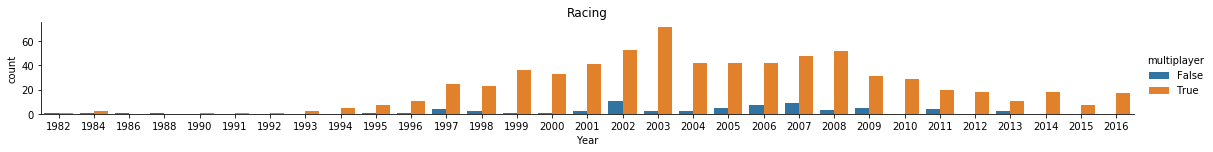

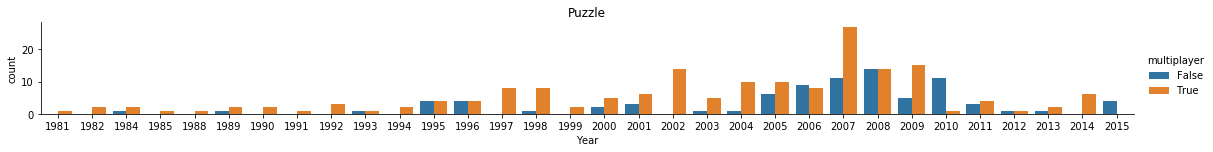

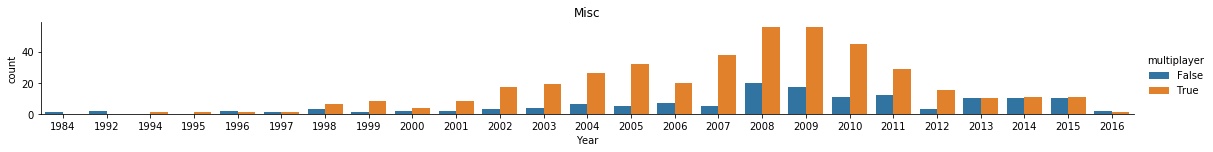

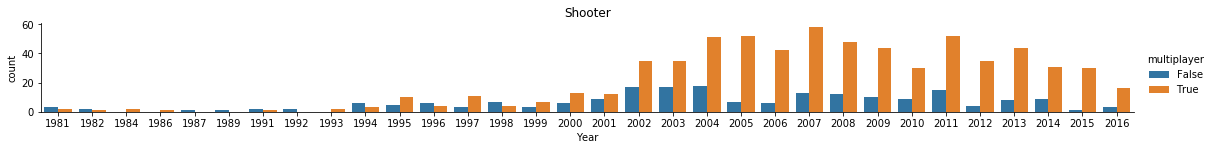

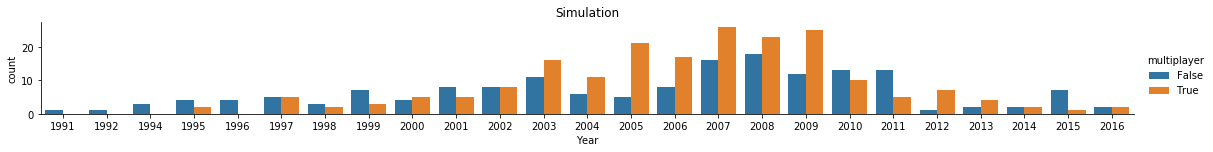

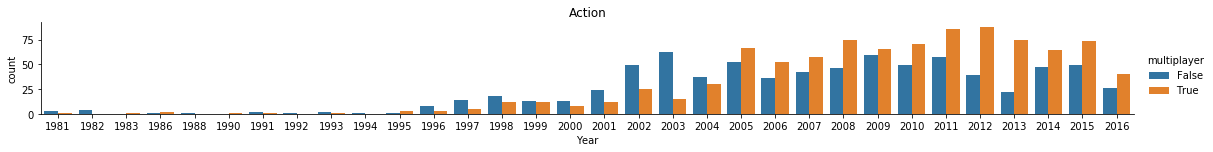

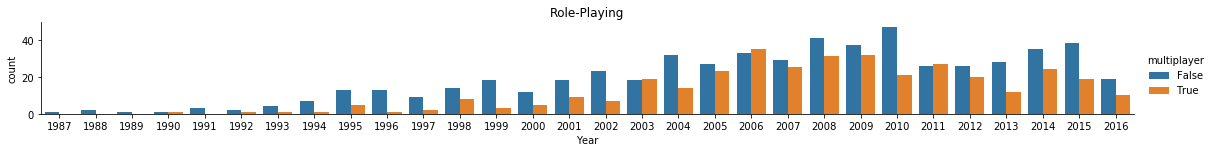

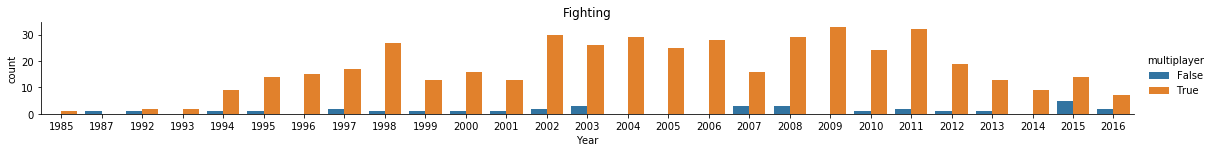

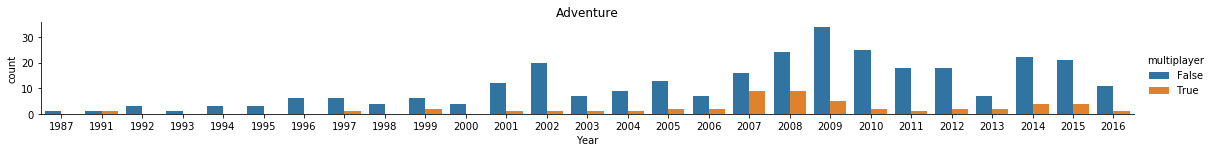

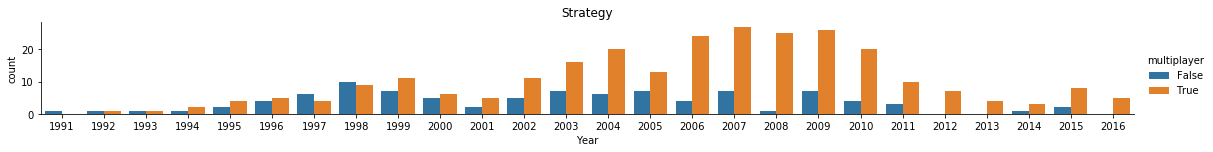

In [5]:
for g in df5.Genre.unique():
    sns.catplot(x='Year', kind='count', data= df5[df5['Genre']==g] , hue = 'multiplayer',  height=2, aspect=8 )
    plt.title(g)
    

In [6]:
df1 = df5.groupby(['Genre','multiplayer']).agg({'multiplayer': ['count']}).reset_index()

In [7]:
df1.columns = ['Genre','is_multiplayer','count']
df1

,Genre,is_multiplayer,count
0,Action,False,778
1,Action,True,948
2,Adventure,False,302
3,Adventure,True,51
4,Fighting,False,33
5,Fighting,True,463
6,Misc,False,139
7,Misc,True,416
8,Platform,False,320
9,Platform,True,221


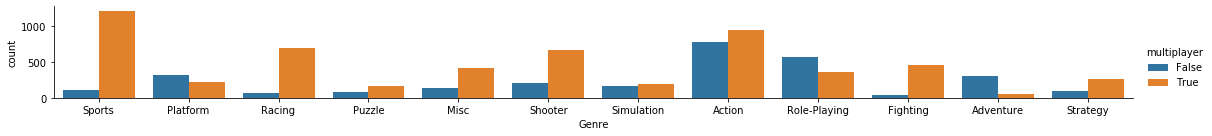

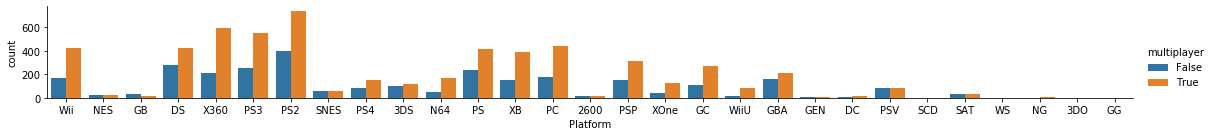

In [8]:
sns.catplot(x='Genre', kind='count', data= df5 , hue = 'multiplayer',  height=2, aspect=8 )
#on remarque que la plupart des jeux sont des jeux multijoueurs, sauf pour les jeux de types adventure,
#role playing et Platform ou les jeux sont singleplayer 
sns.catplot(x='Platform', kind='count', data= df5 , hue = 'multiplayer',  height=2, aspect=8 )

In [9]:
df1 = df5.groupby(['Publisher','multiplayer']).agg({'multiplayer': ['count']}).reset_index()

In [10]:
df1.columns = ['Publisher','multiplayer','count']
df2 = df1.sort_values(by = ['multiplayer','count'], ascending = False)

In [11]:
df3 = df2[df2['multiplayer']== True].head(15)
df4 = df2[df2['multiplayer']== False].head(15)


Text(0.5, 1.0, 'game mode single by publisher ')

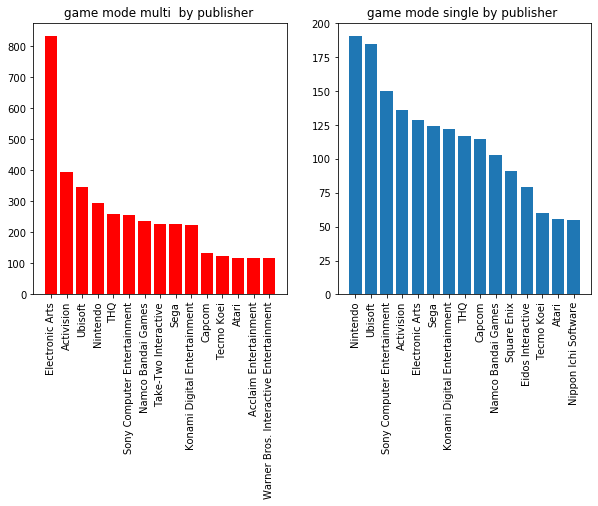

In [12]:
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(10,5)) 

ax1.bar(x = 'Publisher', height = 'count', data = df3,color = 'r')
ax1.tick_params(axis='x', labelrotation=90)
ax1.set_title('game mode multi  by publisher ')



ax2.bar(x = 'Publisher', height = 'count', data = df4)
ax2.tick_params(axis='x', labelrotation=90)
ax2.set_title('game mode single by publisher ')

